# Wavelet based correlation analysis at different time scales

This notebook is an illustration of how wavelet coefficients can be used to analyze correlation between different variables at various time windows.

Daily mean temperature data of Harburg, Cologne, Stuttgart and Berlin for the year 2018 is used (365 days length of the time series)

**Data source: Deutscher Wetterdienst**

The data can be found at [this link](ftp://opendata.dwd.de/climate_environment/CDC/observations_germany/climate/daily/kl/historical/)

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sn
import wmc_modwt

In [2]:
df = pd.read_csv('Daily_temperature_germany_2018.csv')
df['Date'] = df['Date'].apply(lambda date: pd.to_datetime(date))
cities = ['Hamburg','Cologne','Stuttgart','Berlin']

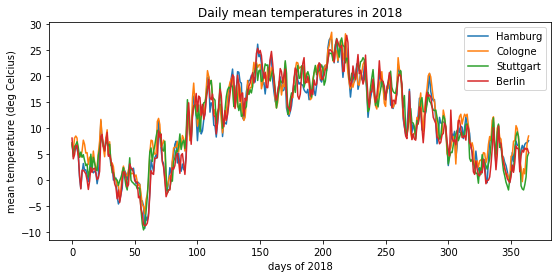

In [3]:
fig, ax = plt.subplots(1,1, figsize=(9,4))
for city in cities: 
    sn.lineplot(df.index.values, df[city].values, ax=ax, label = city)
ax.set_title('Daily mean temperatures in 2018')
ax.set_xlabel('days of 2018')
ax.set_ylabel('mean temperature (deg Celcius)')
plt.show()

From the above visualization it can be seen that at an yearly scale (seeing full 365 days) the daily temperatures in all four cities follow similar trend because they are geographically not very far. But, when we zoom into individual days there is some difference in the daily mean temperature. To analyze how the temperaturers are correlated at different time sclaes, let us use the wavelet multiscale correlation.

The *Maximum Overlap Discrete Wavelet Transform (MODWT)* is used to do this analysis. This method also time scale in multiples of 2. In this case we have 365 days. So the analysis can be done the following time scale windows: 

1-2, 2-4, 4-8, 8-16, 16-32, 32-64, 64-128, 128-256 days

The maximum number of possible scales is obtained as $floor(\log_{2}{365})=8$.

Then the largest possible time window is obtained as $2^8 = 256$ days

**It is important to note that bigger the time window greater is the effect of the boundary depending on the length of the time series**

In [4]:
import math
math.log2(365)

8.51175265376738

In [5]:
wmc_matrices = wmc_modwt.wmcMatrixScales(df[cities].values)
print("The number of correlation matrices obatained are: {}".format(len(wmc_matrices)))

The number of correlation matrices obatained are: 8


Let us see the correlation at 1-2 days which is stored as the first item (index 0) in list *wmc_matrices*

In [6]:
print(pd.DataFrame(wmc_matrices[0], index=cities, columns=cities))

            Hamburg   Cologne  Stuttgart    Berlin
Hamburg    1.000000  0.627043   0.386033  0.650810
Cologne    0.627043  1.000000   0.608616  0.496508
Stuttgart  0.386033  0.608616   1.000000  0.392981
Berlin     0.650810  0.496508   0.392981  1.000000


Let us see the correlation at 16-32 days which is stored as the fith item (index 4) in list *wmc_matrices*

In [7]:
print(pd.DataFrame(wmc_matrices[4], index=cities, columns=cities))

            Hamburg   Cologne  Stuttgart    Berlin
Hamburg    1.000000  0.936143   0.901609  0.959713
Cologne    0.936143  1.000000   0.953114  0.919133
Stuttgart  0.901609  0.953114   1.000000  0.926195
Berlin     0.959713  0.919133   0.926195  1.000000


Let us see the correlation at 128-256 days which is stored as the eigth item (index 7) in list *wmc_matrices*

In [8]:
print(pd.DataFrame(wmc_matrices[7], index=cities, columns=cities))

            Hamburg   Cologne  Stuttgart    Berlin
Hamburg    1.000000  0.998663   0.998462  0.998538
Cologne    0.998663  1.000000   0.999867  0.999608
Stuttgart  0.998462  0.999867   1.000000  0.999312
Berlin     0.998538  0.999608   0.999312  1.000000
